**Delhivery Prediction**<br>
Logistics and Supply Chain Dynamics and Analysis

J Mannavan 2448327<br>
Jenet Shirely J 2448329<br>
Prathana Sharma 2448346<br>
Theresa Abel 2448368

Dataset link: https://www.kaggle.com/datasets/santanukundu/delhivery-dataset?resource=download

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the Delivery DataSet
data=pd.read_csv("/content/delhivery_data.csv")

In [ ]:
#Displaying the DataSet
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
#Information about the DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
#count of columns
data.dtypes.value_counts()

,count
object,12
float64,10
bool,1
int64,1


In [ ]:
#Descriptive Statistics summary of all the numerical columns present in the dataset
data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
# for categorical columns
data.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


Checking Missing Values

In [ ]:
#check the null values
data.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
#check how much percent of null values are present
data.isnull().sum()/data.shape[0]*100

,0
data,0.000000
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000


Removed the missing values as it is less in number.

In [ ]:
#Removing missing values
#since the missing values are less than 1%, we can drop the rows which contain the missing values. No need to impute them.
df=data.dropna()

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
df.shape

(144316, 24)

Check Duplicate Values

In [ ]:
#Checking Duplicated Values
print(df.duplicated().sum())

0


The Time columns are in object type we are converting it into date and time

In [ ]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

Data Visualization

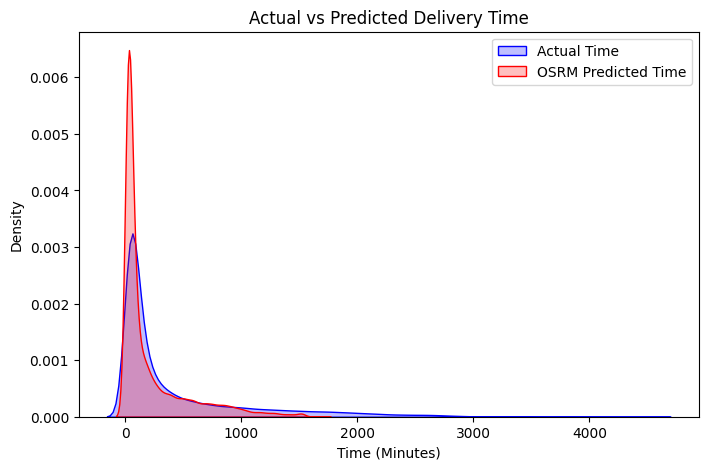

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['actual_time'], label='Actual Time', shade=True, color='blue')
sns.kdeplot(df['osrm_time'], label='OSRM Predicted Time', shade=True, color='red')
plt.xlabel("Time (Minutes)")
plt.ylabel("Density")
plt.title("Actual vs Predicted Delivery Time")
plt.legend()
plt.show()

The graph shows that OSRM's predicted delivery times (red) are generally lower and more concentrated than actual delivery times (blue), indicating underestimation of longer deliveries. While both distributions align for shorter trips, actual times exhibit greater variability, likely due to real-world factors like traffic and delays. Improving the model with additional data, such as traffic patterns, could enhance prediction accuracy.

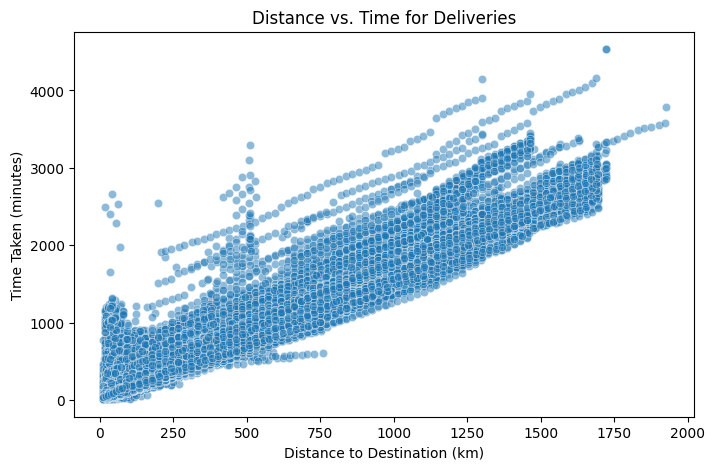

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['actual_distance_to_destination'], y=df['actual_time'], alpha=0.5)
plt.xlabel("Distance to Destination (km)")
plt.ylabel("Time Taken (minutes)")
plt.title("Distance vs. Time for Deliveries")
plt.show()

The graph shows the relationship between delivery distance (in km) and time taken (in minutes). As the distance increases, the delivery time generally increases, but there is noticeable variation, indicating that other factors may influence delivery time.

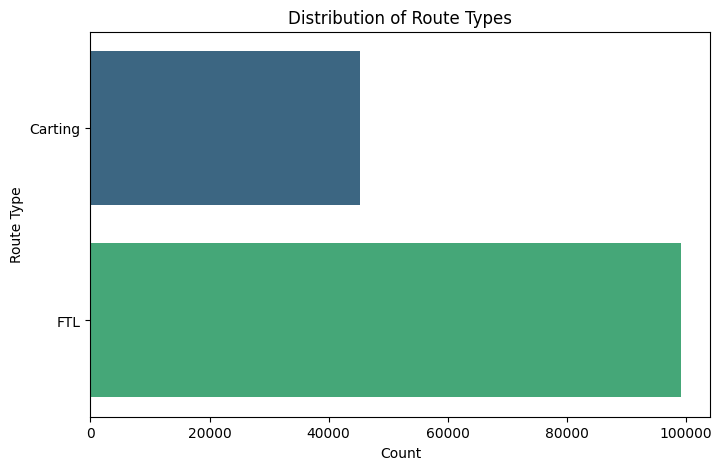

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['route_type'], palette="viridis")
plt.xlabel("Count")
plt.ylabel("Route Type")
plt.title("Distribution of Route Types")
plt.show()

The graph shows the distribution of two types of delivery routes: "FTL" and "Carting." "FTL" (Full Truck Load) has a significantly higher count compared to "Carting," indicating that FTL is the more commonly used route type.

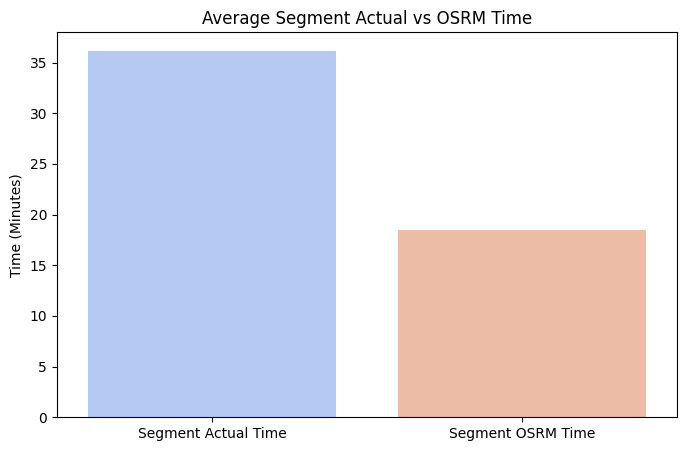

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Segment Actual Time', 'Segment OSRM Time'],
            y=[df['segment_actual_time'].mean(), df['segment_osrm_time'].mean()],
            palette="coolwarm")
plt.ylabel("Time (Minutes)")
plt.title("Average Segment Actual vs OSRM Time")
plt.show()

The graph compares the average actual time taken for a segment with the predicted time from OSRM (Open Source Routing Machine). The actual time is significantly higher than the OSRM-predicted time, suggesting that real-world conditions may cause delays beyond what the model estimates.

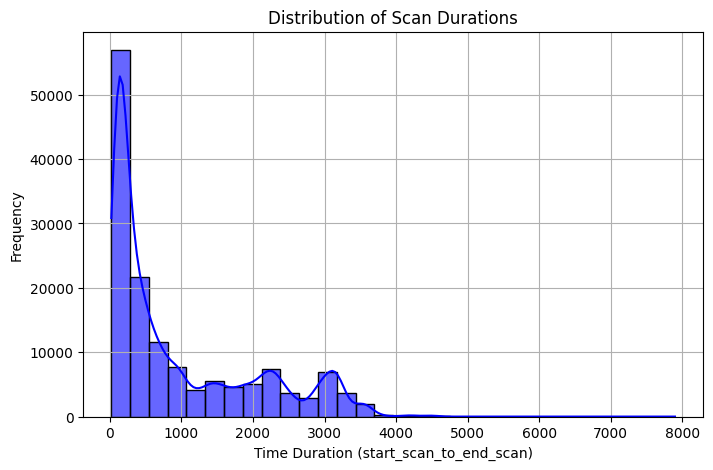

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for start_scan_toend_scan
sns.histplot(df['start_scan_to_end_scan'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)
plt.xlabel('Time Duration (start_scan_to_end_scan)')
plt.ylabel('Frequency')
plt.title('Distribution of Scan Durations')
plt.grid(True)
plt.show()

The graph shows the distribution of scan durations, indicating how long it takes from the start to the end of a scan. Most scans are completed in a short duration, as seen from the peak at lower time values, but there are some instances where scans take significantly longer, forming a long tail in the distribution.

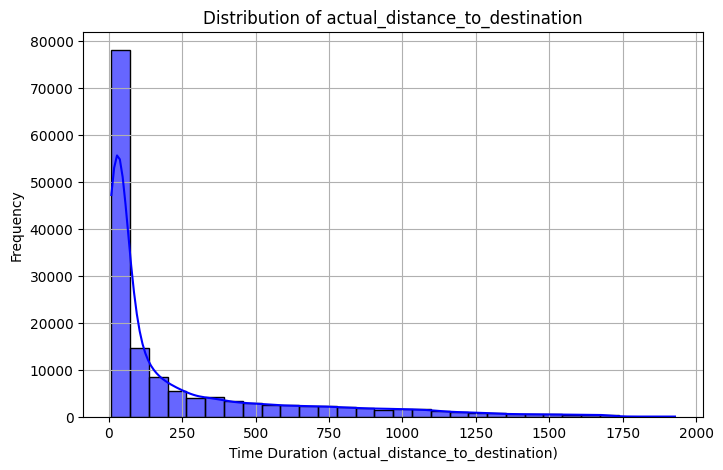

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for actual_distance_to_destination
sns.histplot(df['actual_distance_to_destination'], bins=30, color='blue',kde=True, edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (actual_distance_to_destination)')
plt.ylabel('Frequency')
plt.title('Distribution of actual_distance_to_destination')
plt.grid(True)
plt.show()

The graph represents the distribution of actual distances to destinations. Most deliveries have a shorter distance, as indicated by the high frequency at lower values, while fewer deliveries cover long distances, forming a right-skewed distribution.

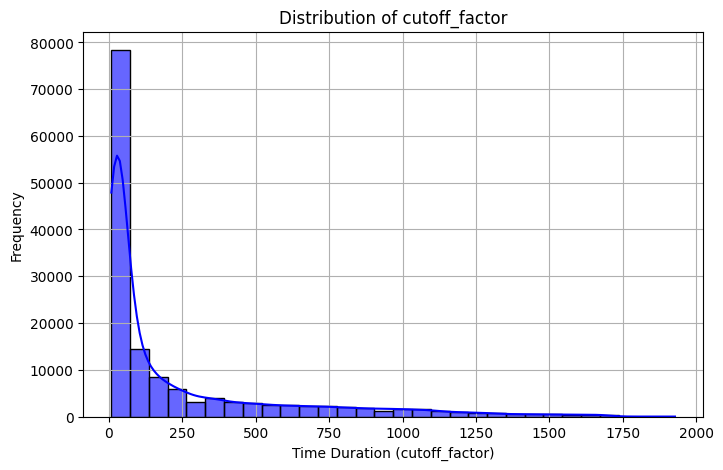

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for cutoff_factor
sns.histplot(df['cutoff_factor'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (cutoff_factor)')
plt.ylabel('Frequency')
plt.title('Distribution of cutoff_factor')
plt.grid(True)
plt.show()

The graph shows the distribution of the cutoff factor, with most values concentrated at the lower end, indicating a right-skewed distribution. This suggests that in most cases, the cutoff factor remains relatively small, while only a few instances have significantly higher values.

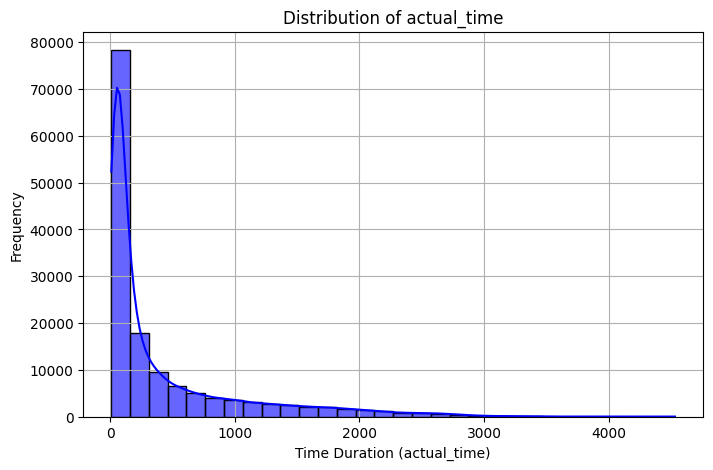

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for actual_time
sns.histplot(df['actual_time'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (actual_time)')
plt.ylabel('Frequency')
plt.title('Distribution of actual_time')
plt.grid(True)
plt.show()

The graph represents the distribution of actual time durations, showing a right-skewed pattern. Most values are concentrated at the lower end, indicating that the majority of actual times are relatively short, while fewer instances have significantly higher durations.

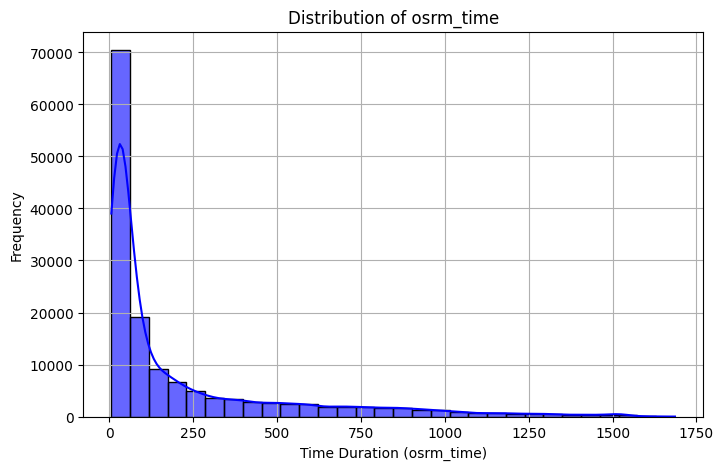

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for osrm_time
sns.histplot(df['osrm_time'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (osrm_time)')
plt.ylabel('Frequency')
plt.title('Distribution of osrm_time')
plt.grid(True)
plt.show()

The graph shows the distribution of OSRM (Open Source Routing Machine) time durations. It is right-skewed, meaning most route durations are short, while fewer instances have significantly higher travel times.

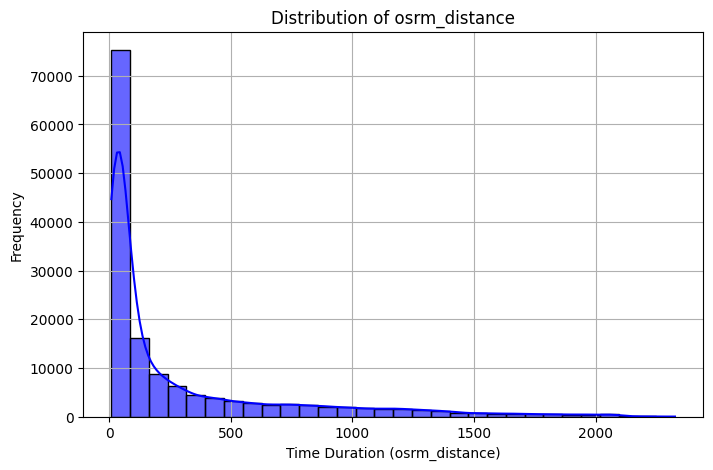

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for osrm_distance
sns.histplot(df['osrm_distance'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (osrm_distance)')
plt.ylabel('Frequency')
plt.title('Distribution of osrm_distance')
plt.grid(True)
plt.show()

The graph shows the distribution of OSRM (Open Source Routing Machine) distances. It is right-skewed, indicating that most distances are short, while fewer cases have significantly higher distances.

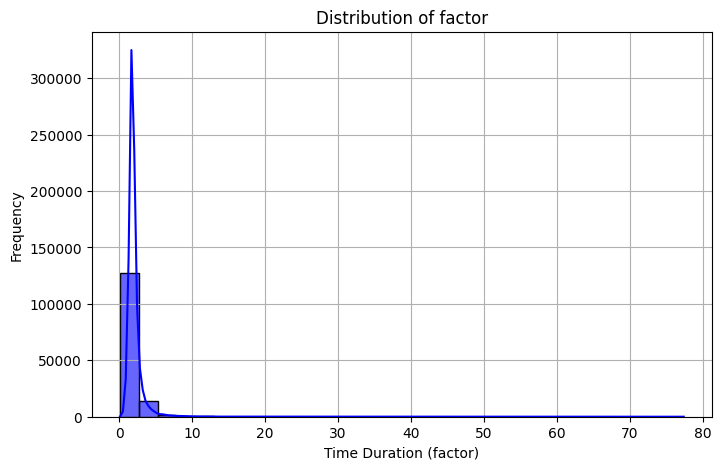

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for factor
sns.histplot(df['factor'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (factor)')
plt.ylabel('Frequency')
plt.title('Distribution of factor')
plt.grid(True)
plt.show()

The graph represents the distribution of the "factor" variable, which appears to be heavily right-skewed. The majority of values are concentrated around a small range near zero, while a few extreme values extend significantly to the right. This suggests that most instances have low factor values, but a few cases exhibit much larger values, possibly outliers. Let me know if you need further analysis or insights!

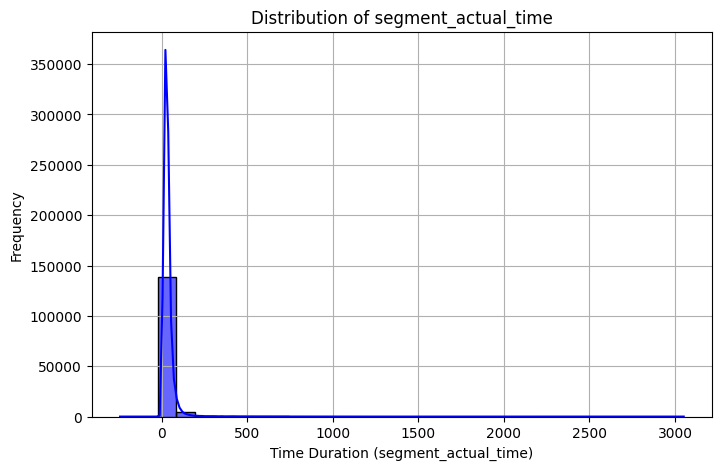

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for segment_actual_time
sns.histplot(df['segment_actual_time'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (segment_actual_time)')
plt.ylabel('Frequency')
plt.title('Distribution of segment_actual_time')
plt.grid(True)
plt.show()

The histogram of "segment_actual_time" shows a heavily right-skewed distribution, with most values concentrated around very low time durations. The high peak near zero suggests that the majority of segment times are small, while a few extreme cases extend significantly to the right. This pattern could indicate the presence of outliers or long tail distributions, which might require further analysis for better modeling or anomaly detection. Let me know if you need any additional insights!

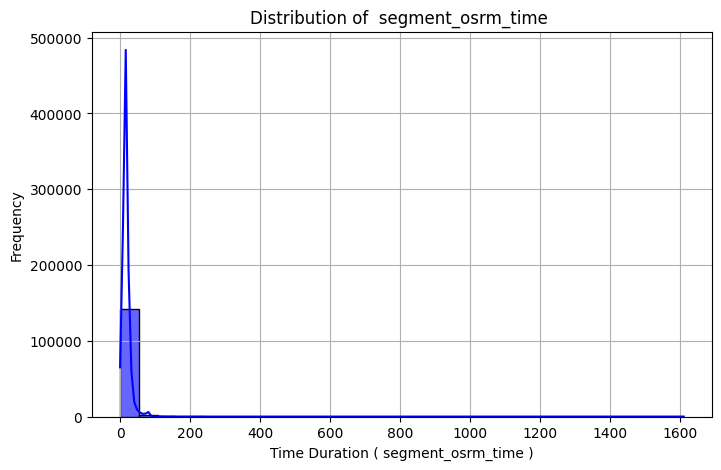

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for  segment_osrm_time
sns.histplot(df['segment_osrm_time'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration ( segment_osrm_time )')
plt.ylabel('Frequency')
plt.title('Distribution of  segment_osrm_time ')
plt.grid(True)
plt.show()

The histogram for "segment_osrm_time" also exhibits a heavily right-skewed distribution, with a sharp peak at lower values and a long tail extending towards higher values. The majority of the data is concentrated near zero, indicating that most segment durations are relatively short, while a few outliers extend significantly.

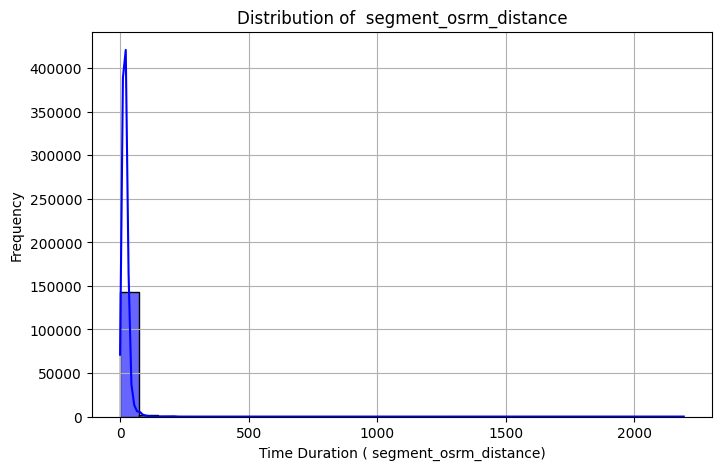

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for  segment_osrm_distance
sns.histplot(df['segment_osrm_distance'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration ( segment_osrm_distance)')
plt.ylabel('Frequency')
plt.title('Distribution of  segment_osrm_distance')
plt.grid(True)
plt.show()

The histogram for "segment_osrm_distance" follows a similar pattern to the other distributions, showing a strong right-skew. The majority of segment distances are concentrated around lower values, with a long tail extending toward larger distances. This suggests that most route segments are relatively short, with fewer longer segments.

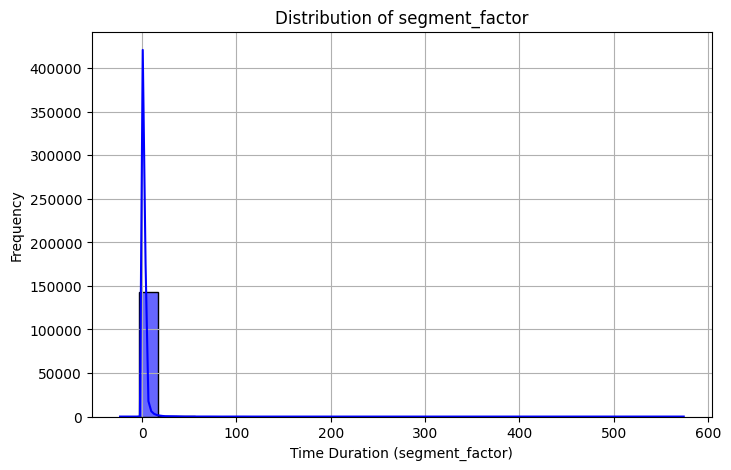

In [ ]:
plt.figure(figsize=(8, 5))

# Histogram for  segment_factor
sns.histplot(df['segment_factor'], bins=30, color='blue',kde=True ,edgecolor='black', alpha=0.6)

plt.xlabel('Time Duration (segment_factor)')
plt.ylabel('Frequency')
plt.title('Distribution of segment_factor')
plt.grid(True)
plt.show()

The histogram with a KDE plot shows the distribution of the segment_factor, which appears to be highly right-skewed, with most values concentrated near zero. The long tail suggests the presence of a few large values, indicating high variability in the dataset.

In [ ]:
# Count of outliers in numerical columns
numeric_cols = data.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
print(outliers.sum())

start_scan_to_end_scan              373
cutoff_factor                     17246
actual_distance_to_destination    17992
actual_time                       16633
osrm_time                         17603
osrm_distance                     17816
factor                            11429
segment_actual_time                9298
segment_osrm_time                  6378
segment_osrm_distance              4315
segment_factor                    13976
dtype: int64


In [ ]:
#counting zero values in outliers
zero_outliers = (numeric_cols == 0) & outliers
print("Columns where outliers contain zero values:")
print(zero_outliers.sum())

Columns where outliers contain zero values:
start_scan_to_end_scan            0
cutoff_factor                     0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


In [ ]:
#counting negative values in outliers
negative_outliers = (numeric_cols < 0) & outliers
print("Columns where outliers contain negative values:")
print(negative_outliers.sum())

Columns where outliers contain negative values:
start_scan_to_end_scan               0
cutoff_factor                        0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
factor                               0
segment_actual_time                 13
segment_osrm_time                    0
segment_osrm_distance                0
segment_factor                    2365
dtype: int64


In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
negative_values = (df_numeric < 0).sum()
print(negative_values)

start_scan_to_end_scan               0
cutoff_factor                        0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
factor                               0
segment_actual_time                 21
segment_osrm_time                    0
segment_osrm_distance                0
segment_factor                    2359
dtype: int64


There is negative values in outliers. To deal with negative value we have used absolute function.

In [ ]:
#handing negative values by replacing it with absolute values
df.loc[:, 'segment_actual_time'] = df['segment_actual_time'].abs()
df.loc[:, 'segment_factor'] = df['segment_factor'].abs()

In [ ]:
zero_counts = (df == 0).sum()
print(zero_counts)

data                                  0
trip_creation_time                    0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
od_start_time                         0
od_end_time                           0
start_scan_to_end_scan                0
is_cutoff                         25980
cutoff_factor                         0
cutoff_timestamp                      0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
factor                                0
segment_actual_time                1943
segment_osrm_time                  2341
segment_osrm_distance              1531
segment_factor                      232
dtype: int64


In [ ]:
#percentage of zero values
zero_percentage = (data == 0).sum() / len(data) * 100
print(zero_percentage)

data                               0.000000
trip_creation_time                 0.000000
route_schedule_uuid                0.000000
route_type                         0.000000
trip_uuid                          0.000000
source_center                      0.000000
source_name                        0.000000
destination_center                 0.000000
destination_name                   0.000000
od_start_time                      0.000000
od_end_time                        0.000000
start_scan_to_end_scan             0.000000
is_cutoff                         18.028951
cutoff_factor                      0.000000
cutoff_timestamp                   0.000000
actual_distance_to_destination     0.000000
actual_time                        0.000000
osrm_time                          0.000000
osrm_distance                      0.000000
factor                             0.000000
segment_actual_time                1.347443
segment_osrm_time                  1.620107
segment_osrm_distance           

As our data is skewed, and have Zero values, i have replaced all Zero values with median

In [ ]:
df.loc[:, 'segment_actual_time'] = df['segment_actual_time'].replace(0, df['segment_actual_time'].median())
df.loc[:, 'segment_osrm_time'] = df['segment_osrm_time'].replace(0, df['segment_osrm_time'].median())
df.loc[:, 'segment_osrm_distance'] = df['segment_osrm_distance'].replace(0, df['segment_osrm_distance'].median())
df.loc[:, 'segment_factor'] = df['segment_factor'].replace(0, df['segment_factor'].median())

As Data is skewed we have used log transformation to reduce the impact

In [ ]:
import numpy as np

skewed_cols = ['start_scan_to_end_scan', 'cutoff_factor', 'actual_distance_to_destination',
               'actual_time', 'osrm_time', 'osrm_distance', 'factor']

data[skewed_cols] = data[skewed_cols].apply(lambda x: np.log1p(x))

<Axes: >

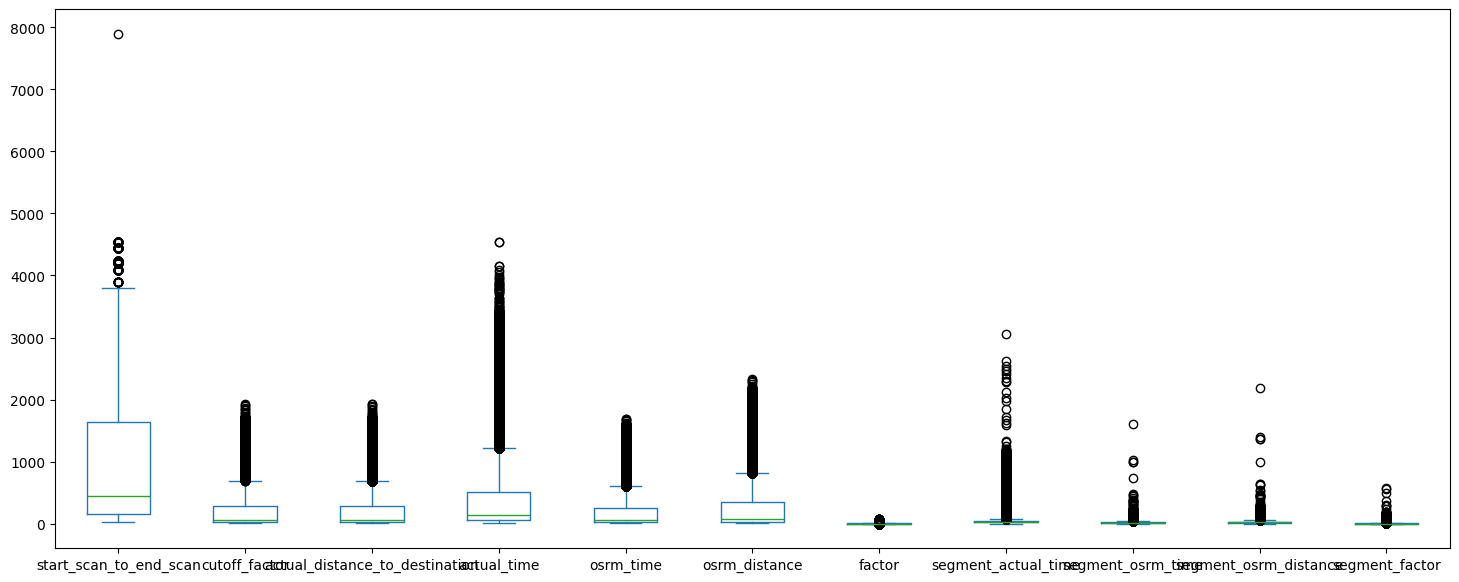

In [ ]:
df.plot(kind='box',figsize=(18,7))

This boxplot visualizes the distribution of multiple variables, showing their spread, central tendency, and presence of outliers. Most variables exhibit a high concentration of values near the lower range, with numerous outliers extending significantly beyond the upper whiskers. This suggests skewed distributions and possible anomalies in the dataset.

In [ ]:
# Count of outliers in numerical columns
numeric_cols = data.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
print(outliers.sum())

start_scan_to_end_scan                0
cutoff_factor                         0
actual_distance_to_destination        0
actual_time                           0
osrm_time                             0
osrm_distance                         0
factor                            10138
segment_actual_time                9298
segment_osrm_time                  6378
segment_osrm_distance              4315
segment_factor                    13976
dtype: int64


In [ ]:
df.shape

(144316, 24)

Feature Engineering

In [ ]:
#Count of unique values in each categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
unique_counts = categorical_columns.nunique()
print(unique_counts)

data                       2
route_schedule_uuid     1497
route_type                 2
trip_uuid              14787
source_center           1496
source_name             1496
destination_center      1466
destination_name        1466
cutoff_timestamp       92894
dtype: int64


In [ ]:
# used frequency Encoding for source_center, destination_center, source_name, destination_name
for col in ["source_center", "destination_center", "source_name", "destination_name"]:
    freq_encoding = df[col].value_counts(normalize=True)
    df[col] = df[col].map(freq_encoding)

In [ ]:
#label encoding for route_type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['route_type']=le.fit_transform(df['route_type'])

In [ ]:
#droping data, is_cutoff, cutoff_factor and cutoff_timestamp as its not required
df.drop(columns=['data','is_cutoff','cutoff_factor','cutoff_timestamp','route_schedule_uuid','trip_uuid'],inplace=True)

In [ ]:
df["trip_duration"] = (df["od_end_time"] - df["od_start_time"]).dt.total_seconds() / 60

In [ ]:
#droping od_end_time, od_start_time
df.drop(columns=['od_end_time','od_start_time'],inplace=True)

In [ ]:
df.shape

(144316, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144316 non-null  datetime64[ns]
 1   route_type                      144316 non-null  int64         
 2   source_center                   144316 non-null  float64       
 3   source_name                     144316 non-null  float64       
 4   destination_center              144316 non-null  float64       
 5   destination_name                144316 non-null  float64       
 6   start_scan_to_end_scan          144316 non-null  float64       
 7   actual_distance_to_destination  144316 non-null  float64       
 8   actual_time                     144316 non-null  float64       
 9   osrm_time                       144316 non-null  float64       
 10  osrm_distance                   144316 non-null  float64     

In [ ]:
y = df['actual_time']
df = df.drop(columns=['actual_time'])

Feature Selection

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_numeric = df.select_dtypes(include=['number'])
df_std=std.fit_transform(df_numeric)

In [ ]:
# Principal Component Analysis [PCA]
from sklearn.decomposition import PCA
pca=PCA()
df_pca=pca.fit_transform(df_std)

In [ ]:
#to determine how many principal components to keep, we can check varience ratio
var=pca.explained_variance_ratio_

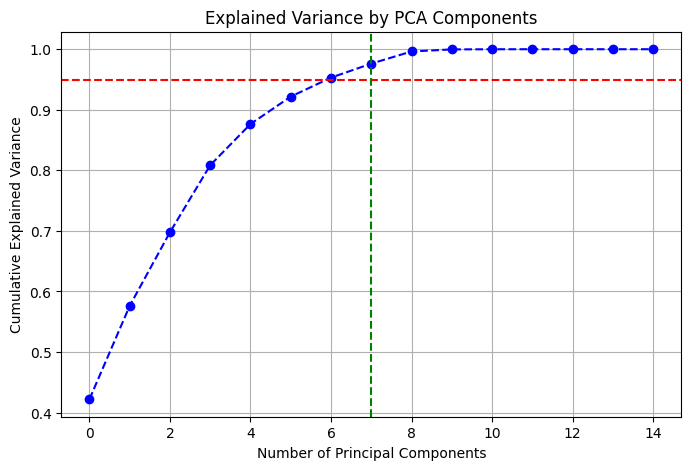

Optimal number of components: 7


In [ ]:
#ploting a scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(var), marker='o', linestyle='--', color='b',label="Cumulative Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
optimal_components = np.argmax(np.cumsum(var) >= 0.95) + 1
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f"Optimal Components = {optimal_components}")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()
print(f"Optimal number of components: {optimal_components}")

his scree plot shows the cumulative explained variance by principal component analysis (PCA). The red dashed line indicates a threshold (likely 95% explained variance), and the green vertical line marks the optimal number of components, which is 7. This suggests that selecting 7 principal components retains most of the dataset's variance while reducing dimensionality.

In [ ]:
#Applying PCA with the Optimal number of components
opt_pca=PCA(n_components=7)
df_pca=opt_pca.fit_transform(df_std)

df_pca_opt = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(7)])
df_pca_opt.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.503709,-0.826042,-0.055785,-0.103785,-0.202625,-0.851742,0.160208
1,-2.515225,-1.017531,-0.004085,-0.076105,-0.250159,-0.817997,0.162377
2,-2.501559,-0.881700,0.251105,-0.017759,-0.271804,-0.786010,0.241718
3,-2.398424,-0.629554,0.076525,-0.086870,-0.268881,-0.925307,0.153664
4,-2.538745,-1.281395,0.338532,0.034032,-0.362591,-0.749272,0.049297


In [ ]:
# Print variance ratio for each selected component
explained_variance = opt_pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.42206826 0.15420524 0.12157859 0.11067222 0.06791665 0.04532744
 0.03131651]
Cumulative Explained Variance: [0.42206826 0.5762735  0.69785209 0.80852431 0.87644096 0.92176839
 0.9530849 ]


**Model Building**

In [ ]:
X = df_pca_opt
#The target variable 'actual_time' has already been stored in 'y'.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error


# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define batch size
batch_size = 2000

# Initialize models without GridSearchCV
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42),
    "XGBoost Regression": XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
}

# Train models in batches
results = {}

for name, model in models.items():
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        if i == 0:
            model.fit(X_batch, y_batch)
        else:
            model.fit(X_batch, y_batch)
    # Predict on train & test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute R² and MAE
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Store results
    results[name] = {
        "R2 Score (Train)": r2_train, "R2 Score (Test)": r2_test,
        "MAE (Train)": mae_train, "MAE (Test)": mae_test
    }

# Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  R2 Score (Train): {metrics['R2 Score (Train)']:.4f}")
    print(f"  R2 Score (Test): {metrics['R2 Score (Test)']:.4f}")
    print(f"  MAE (Train): {metrics['MAE (Train)']:.4f}")
    print(f"  MAE (Test): {metrics['MAE (Test)']:.4f}")
    print("---")


from tabulate import tabulate

table_data = []
for name, metrics in results.items():
    table_data.append([
        name,
        f"{metrics['R2 Score (Train)']:.4f}",
        f"{metrics['R2 Score (Test)']:.4f}",
        f"{metrics['MAE (Train)']:.4f}",
        f"{metrics['MAE (Test)']:.4f}"
    ])

headers = ["Model", "R2 Score (Train)", "R2 Score (Test)", "MAE (Train)", "MAE (Test)"]

print("\nModel Performance:\n")
print(tabulate(table_data, headers=headers, tablefmt="grid"))



Model Performance:
Linear Regression:
  R2 Score (Train): 0.9675
  R2 Score (Test): 0.9663
  MAE (Train): 68.7235
  MAE (Test): 68.8245
---
Decision Tree Regression:
  R2 Score (Train): 0.9349
  R2 Score (Test): 0.9325
  MAE (Train): 84.5939
  MAE (Test): 85.6127
---
Random Forest Regression:
  R2 Score (Train): 0.9671
  R2 Score (Test): 0.9647
  MAE (Train): 61.0937
  MAE (Test): 62.3139
---
XGBoost Regression:
  R2 Score (Train): 0.9614
  R2 Score (Test): 0.9598
  MAE (Train): 71.9757
  MAE (Test): 72.8983
---

Model Performance:

+--------------------------+--------------------+-------------------+---------------+--------------+
| Model                    |   R2 Score (Train) |   R2 Score (Test) |   MAE (Train) |   MAE (Test) |
+==========================+====================+===================+===============+==============+
| Linear Regression        |             0.9675 |            0.9663 |       68.7235 |      68.8245 |
+--------------------------+--------------------+-------

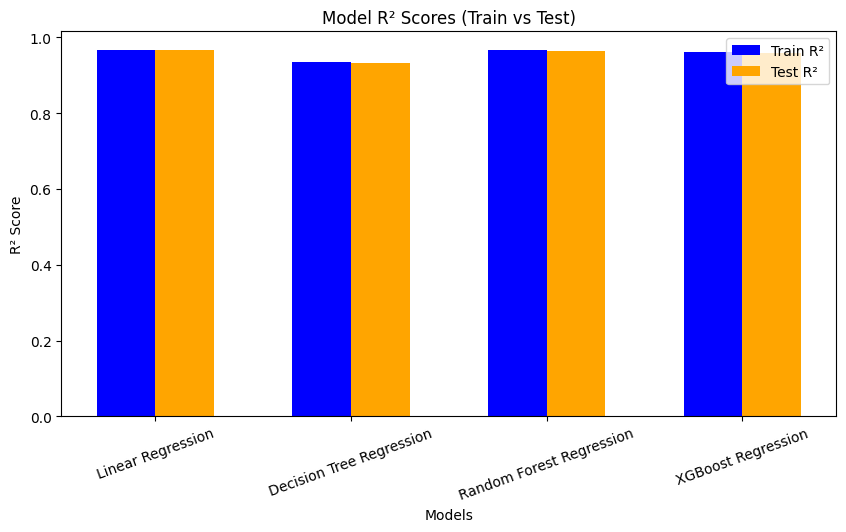

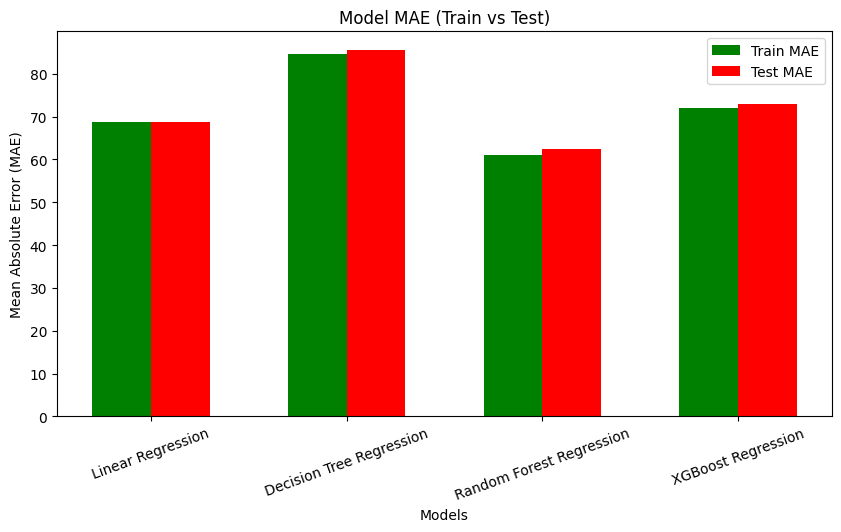

In [ ]:
# Extract results
r2_train_values = [results[m]["R2 Score (Train)"] for m in models.keys()]
r2_test_values = [results[m]["R2 Score (Test)"] for m in models.keys()]
mae_train_values = [results[m]["MAE (Train)"] for m in models.keys()]
mae_test_values = [results[m]["MAE (Test)"] for m in models.keys()]
x_labels = list(models.keys())

# Define bar width
bar_width = 0.3
x = np.arange(len(models))

#  Bar Plot: R² Scores for Training vs Testing
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, r2_train_values, bar_width, label="Train R²", color="blue")
plt.bar(x + bar_width/2, r2_test_values, bar_width, label="Test R²", color="orange")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model R² Scores (Train vs Test)")
plt.xticks(x, x_labels, rotation=20)
plt.legend()
plt.show()

# Bar Plot: MAE for Training vs Testing
plt.figure(figsize=(10, 5))
plt.bar(x - bar_width/2, mae_train_values, bar_width, label="Train MAE", color="green")
plt.bar(x + bar_width/2, mae_test_values, bar_width, label="Test MAE", color="red")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model MAE (Train vs Test)")
plt.xticks(x, x_labels, rotation=20)
plt.legend()
plt.show()


These bar charts compare the performance of four regression models using R² scores and Mean Absolute Error (MAE) for both training and test datasets:

R² Score Comparison:

All models exhibit high R² values, suggesting strong predictive performance.

Linear Regression and Random Forest show near-perfect fit, while Decision Tree has slightly lower R².

The small gap between train and test scores indicates minimal overfitting.

MAE Comparison:

Lower MAE indicates better prediction accuracy.

Decision Tree has the highest MAE, suggesting weaker generalization.

Random Forest and XGBoost have the lowest MAE, indicating better performance.

Random Forest and XGBoost seem to be the best-performing models overall.

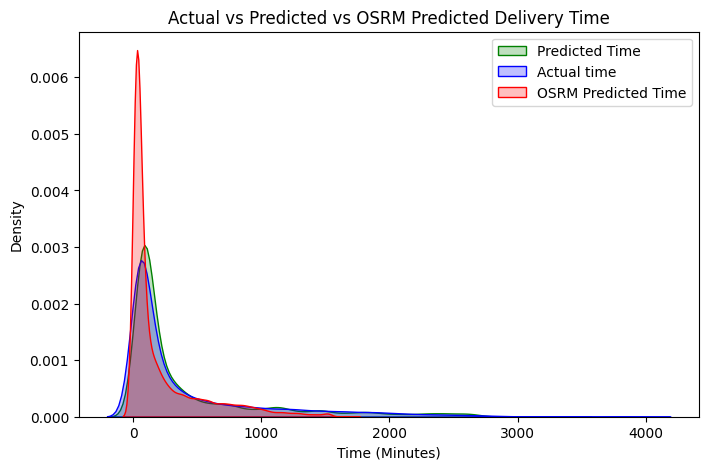

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test_pred, label='Predicted Time', shade=True, color='green')
sns.kdeplot(y_test,label='Actual time', shade=True, color='blue')
sns.kdeplot(df['osrm_time'], label='OSRM Predicted Time', shade=True, color='red')
plt.xlabel("Time (Minutes)")
plt.ylabel("Density")
plt.title("Actual vs Predicted vs OSRM Predicted Delivery Time")
plt.legend()
plt.show()

This density plot compares actual, predicted, and OSRM (Open Source Routing Machine) predicted delivery times. All three distributions are right-skewed, with most values concentrated near the lower end. The OSRM predicted time (red) has a sharper peak, indicating it frequently underestimates delivery time compared to actual (blue) and predicted (green) values. The overlap suggests the model's predictions align well with actual times, but there are long-tail cases where delivery times vary significantly.

In [ ]:
num_results =pd.DataFrame(y_test_pred,columns=['Predicted Time'])

In [ ]:
num_results

,Predicted Time
0,76.680305
1,487.212982
2,102.619110
3,58.294456
4,87.574883
...,...
43290,358.565063
43291,140.766052
43292,781.705933
43293,56.843731
